importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data Collection & Analysis

In [3]:
#loading the data from csv file to a pandas data frame
insurance_dataset = pd.read_csv('/content/medical_insurance.csv')

In [4]:
#print first 5 rows of dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# No of rows & columns
insurance_dataset.shape

(2772, 7)

In [7]:
#getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


Cateogorical Features:

*   Sex
*   Smoker
*   Region





In [8]:
#checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [9]:
# Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-3121029920.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


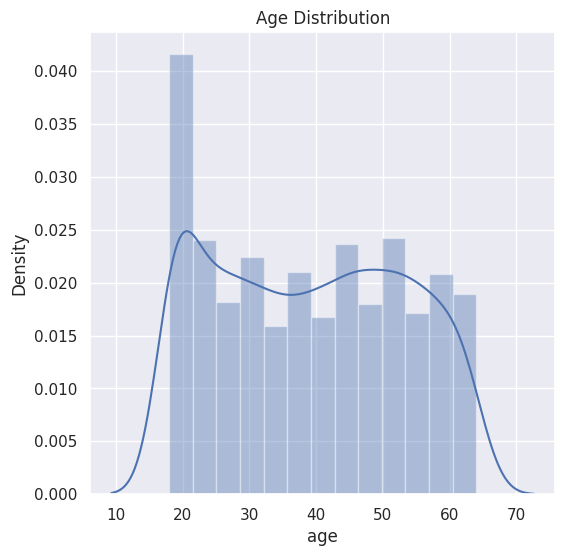

In [14]:
#distribution of age value
sns.set() #to give grids in our plots
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

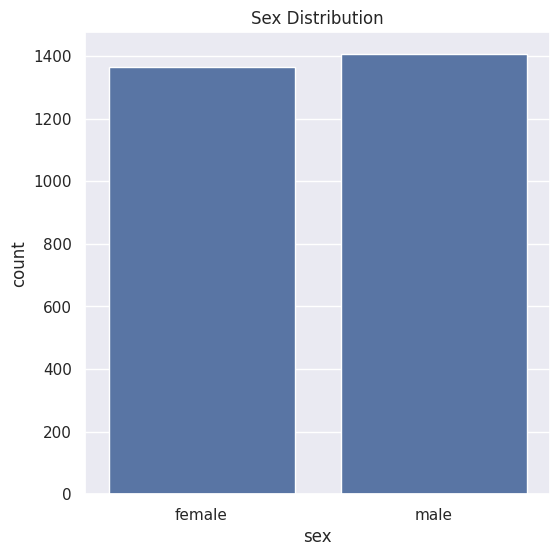

In [15]:
# Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [16]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,1406
female,1366


/tmp/ipython-input-872932173.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


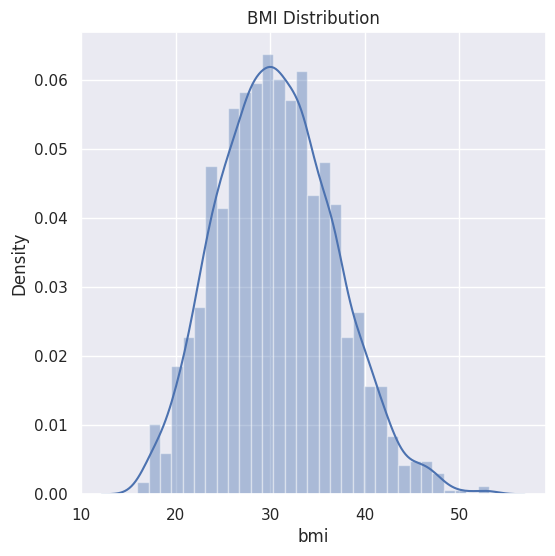

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range -> 18.5 to 24.9

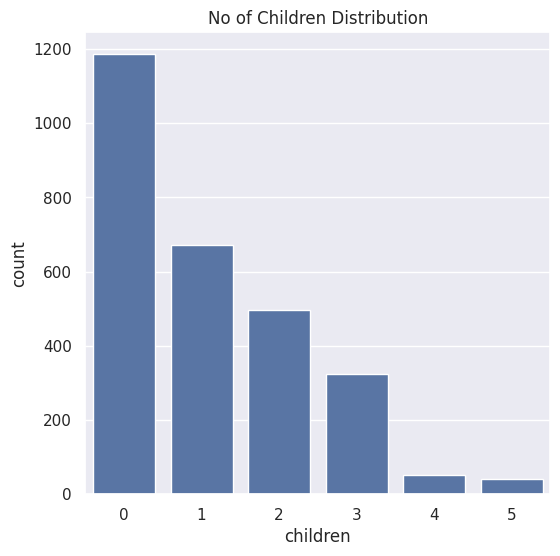

In [19]:
#Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('No of Children Distribution')
plt.show()

In [20]:
insurance_dataset['children'].value_counts()

,count
children,
0,1186
1,672
2,496
3,324
4,52
5,42


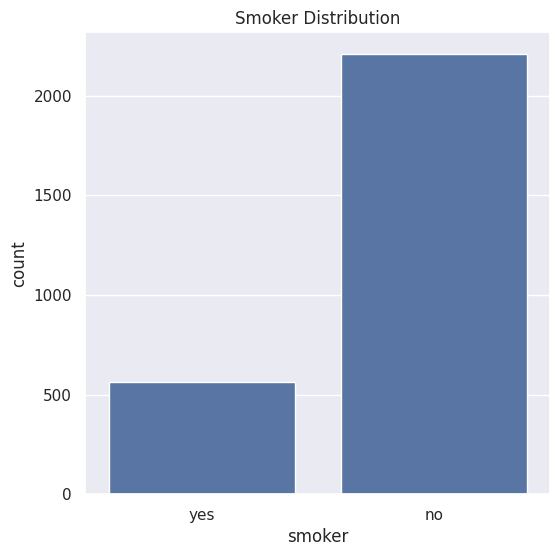

In [22]:
#Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [24]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,2208
yes,564


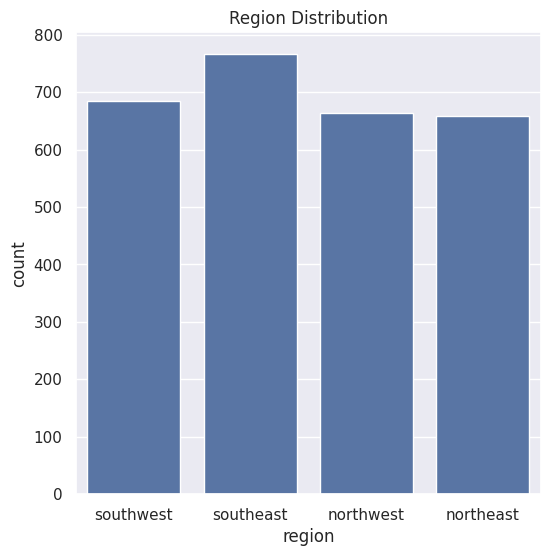

In [25]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [26]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,766
southwest,684
northwest,664
northeast,658


/tmp/ipython-input-3920315798.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


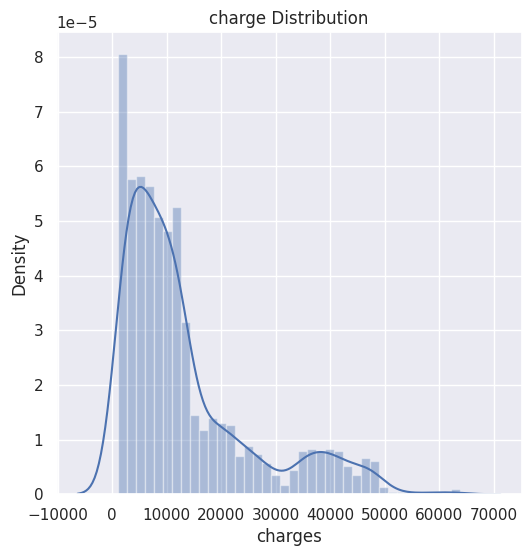

In [27]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charge Distribution')
plt.show()

Data Preproccessing

Encoding the cateogorical features

In [32]:
#encoding the sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding the 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding the region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace=True)

# Explicitly handle downcasting to avoid FutureWarnings
insurance_dataset = insurance_dataset.infer_objects(copy=False)

In [33]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


Splitting the Features & the Target

In [34]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [35]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       1       0
2768   21    1  34.600         0       1       1
2769   19    0  26.030         1       0       2
2770   23    0  18.715         0       1       2
2771   54    0  31.600         0       1       1

[2772 rows x 6 columns]


In [36]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


Spliting the data into train data & test data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(2772, 6) (2217, 6) (555, 6)


Model Training

Linear Regression

In [39]:
#loading the linear regression model

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [41]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)


In [42]:
#R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value:', r2_train)



R squared value: 0.7562733333619166


In [43]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)


In [44]:
#r2 value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value:', r2_test)

R squared value: 0.7286369287098544


Building predictive system

In [45]:
input_data = (31,1,25.74,0,1,0)

#change input data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[3440.43936739]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
# Get the feature names from the training data
feature_names = X_train.columns

# Convert input_data to a pandas DataFrame with the correct column names
input_data_df = pd.DataFrame([input_data], columns=feature_names)

# Make the prediction using the DataFrame
prediction = regressor.predict(input_data_df)

print(prediction)

print('The insurance cost is USD', prediction[0])

[3440.43936739]
The insurance cost is USD 3440.4393673856557
